In [1]:
import pandas as pd
HR_data=pd.read_csv('HR-Employee-Attrition.csv')
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Check the dtype, null and duplicates
HR_data.info()
HR_data.isnull().sum()
HR_data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

np.int64(0)

In [6]:
# Drop the extra, they are constant

HR_data.drop(['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'],axis=1, inplace=True)

C:\Users\JYOTIRMAY DAS\AppData\Local\Temp\ipykernel_3232\1287963788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=HR_data, palette='Set2')


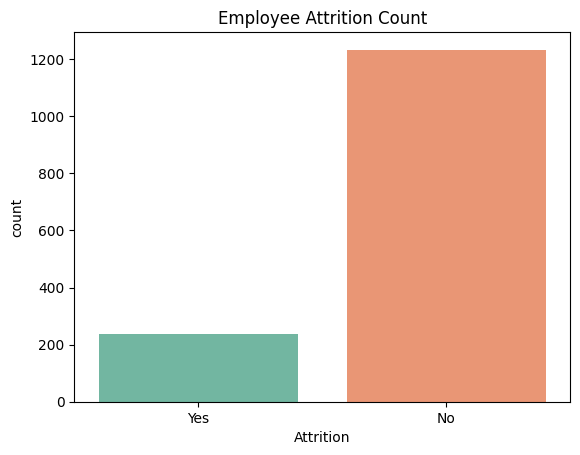

In [13]:
# Visualizing the Attrition count

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition', data=HR_data, palette='Set2')
plt.title('Employee Attrition Count')
plt.show()


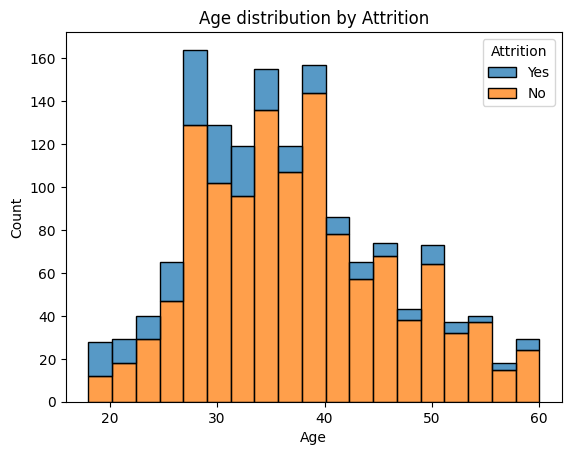

In [15]:
# Visualization the Age distribution by Attrition
sns.histplot(data=HR_data,x='Age',hue='Attrition',multiple='stack')
plt.title('Age distribution by Attrition')
plt.show()

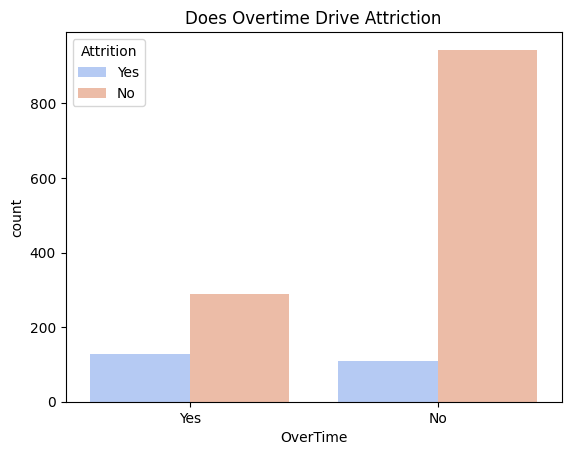

In [18]:
# Overtime vs Attrition
sns.countplot(data=HR_data,x='OverTime', hue='Attrition',palette='coolwarm')
plt.title('Does Overtime Drive Attriction')
plt.show()

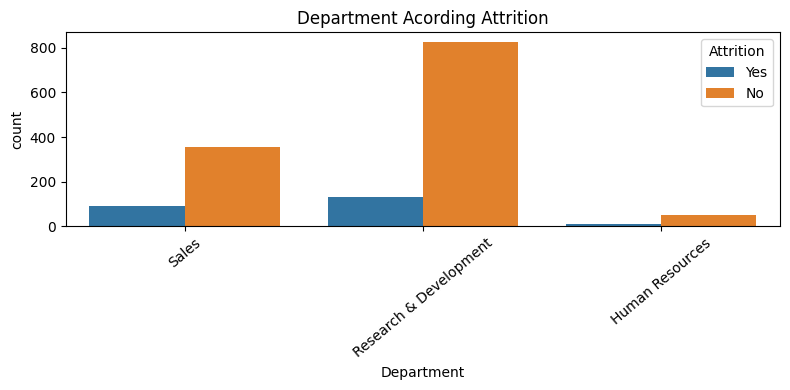

In [29]:
# Department vs Attrition
plt.figure(figsize=(8,4))
sns.countplot(data=HR_data, x='Department',hue='Attrition')
plt.title('Department Acording Attrition')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


In [34]:
# What to create heatmap on Attrition
# Change the 'YES' 'NO' into '1''0'
HR_data['Attrition_Encoded'] = HR_data['Attrition'].map({'Yes': 1, 'No': 0})


In [35]:
numeric_df['Attrition'] = HR_data['Attrition_Encoded']


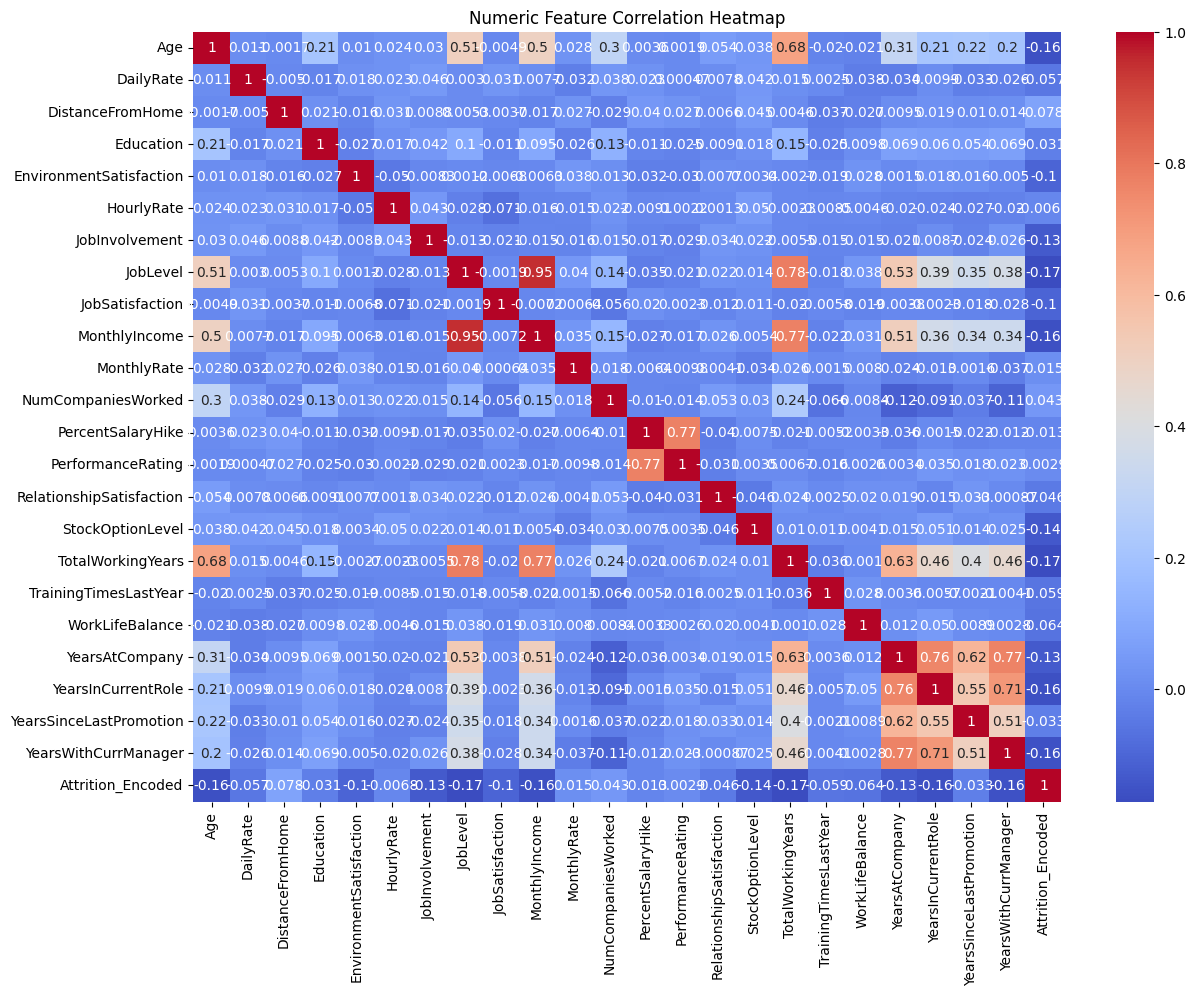

In [37]:
# Cheacking Numeric Correlation 

plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation Heatmap")
plt.show()


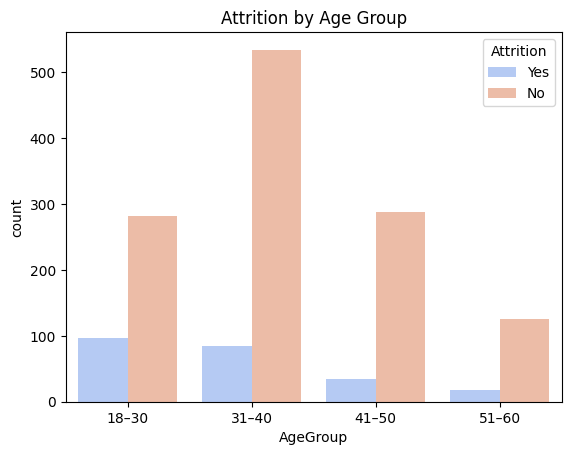

In [41]:
# Who is leaving the company
# Attrition by Age Group
HR_data['AgeGroup'] = pd.cut(HR_data['Age'], bins=[18, 30, 40, 50, 60], labels=['18–30', '31–40', '41–50', '51–60'])

sns.countplot(data=HR_data, x='AgeGroup', hue='Attrition', palette='coolwarm')
plt.title('Attrition by Age Group')
plt.show()


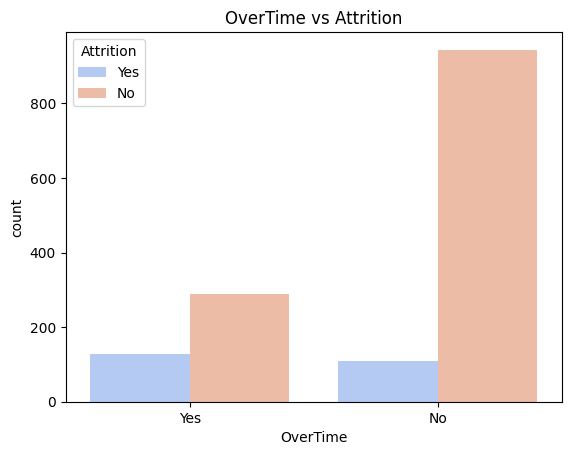

In [44]:
# Is Over Time cousing the burnout
sns.countplot(data=HR_data, x = 'OverTime',hue='Attrition',palette='coolwarm')
plt.title('OverTime vs Attrition')
plt.show()


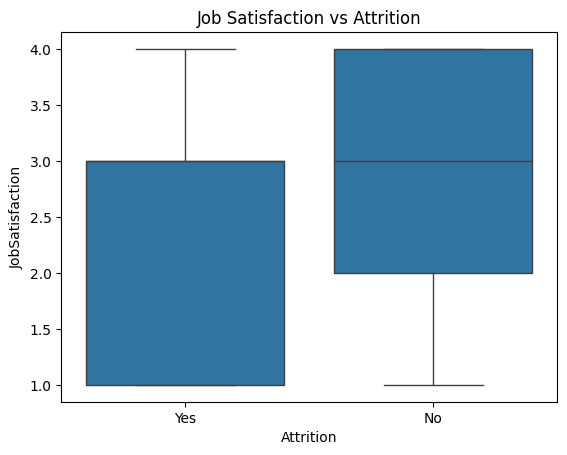

In [47]:
# Job Satisfaction
sns.boxplot(data=HR_data,x='Attrition',y='JobSatisfaction')
plt.title('Job Satisfaction vs Attrition')
plt.show()

In [49]:
# Save the Clean data for Visulization
HR_data.to_csv('HR_Attrition.csv',index=False)